In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, layers

In [130]:
df = pd.read_csv('AqSolDB.csv')
df.head()

,ID,Name,InChI,InChIKey,SMILES,Solubility,SD,Ocurrences,Group,MolWt,...,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,BertzCT
0,A-3,"N,N,N-trimethyloctadecan-1-aminium bromide",InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...,SZEMGTQCPRNXEG-UHFFFAOYSA-M,[Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C,-3.616127,0.0,1,G1,392.510,...,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,210.377334
1,A-4,Benzo[cd]indol-2(1H)-one,InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...,GPYLCFQEKPUWLD-UHFFFAOYSA-N,O=C1Nc2cccc3cccc1c23,-3.254767,0.0,1,G1,169.183,...,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,511.229248
2,A-5,4-chlorobenzaldehyde,InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H,AVPYQKSLYISFPO-UHFFFAOYSA-N,Clc1ccc(C=O)cc1,-2.177078,0.0,1,G1,140.569,...,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,202.661065
3,A-8,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...,XTUPUYCJWKHGSW-UHFFFAOYSA-L,[Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...,-3.924409,0.0,1,G1,756.226,...,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,1964.648666
4,A-9,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...,FAUAZXVRLVIARB-UHFFFAOYSA-N,C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...,-4.662065,0.0,1,G1,422.525,...,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,769.899934


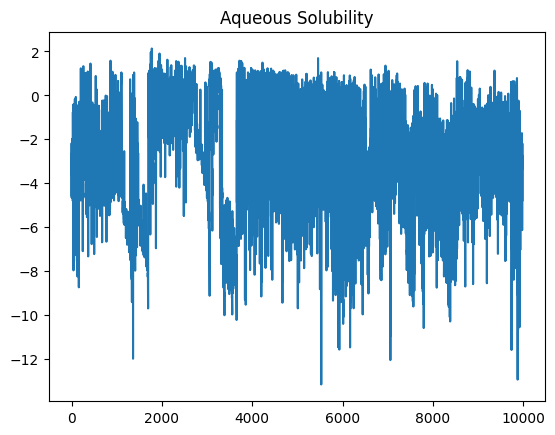

In [131]:
# Train-validation-test split (70-15-15)
data = df.to_numpy()
X = data[:,9:].astype(np.float32) # Feature matrix (17 features)
y = data[:,5].astype(np.float32)  # Aqueous solubility

plt.plot(y); plt.title('Aqueous Solubility')
plt.show()

In [132]:
n = len(X)
n1 = int(n*0.7); n2 = int(n*0.85)
X_train, X_val, X_test = X[:n1], X[n1:n2], X[n2:]
y_train, y_val, y_test = y[:n1], y[n1:n2], y[n2:]

In [133]:
model = Sequential()
model.add(layers.Input(shape=(17,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [134]:
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1802.1953 - mae: 20.0730 - val_loss: 19.9237 - val_mae: 3.7129
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 308.9009 - mae: 8.0018 - val_loss: 8.2795 - val_mae: 2.1931
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 184.5004 - mae: 6.3865 - val_loss: 14.2397 - val_mae: 2.7235
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 78.5678 - mae: 4.4336 - val_loss: 9.6568 - val_mae: 2.1952
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 40.8305 - mae: 3.1485 - val_loss: 5.8088 - val_mae: 1.6231
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 20.3293 - mae: 2.5178 - val_loss: 5.3524 - val_mae: 1.6884
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 9.1313 - mae: 2.0135 - val_loss: 5.3431 - val_mae: 1.6897
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 16.7582 - mae: 2.0600 - val_loss: 4.6123 - val_mae: 1.5417
Epoch 9/100
219/219 ━━━━━━━━━━━━━━

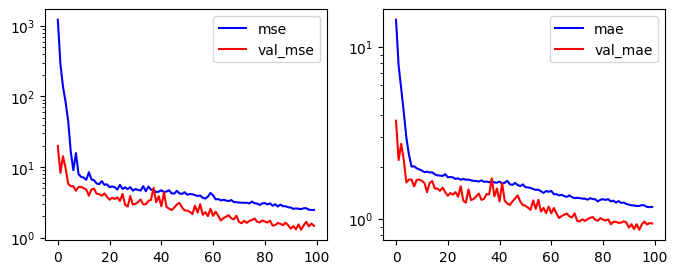

In [135]:
def plotloss(h):
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.plot(h.epoch, h.history['loss'], 'b', h.epoch, h.history['val_loss'], 'r'); plt.legend(['mse', 'val_mse'])
    plt.yscale('log')
    
    plt.subplot(122)
    plt.plot(h.epoch, h.history['mae'], 'b', h.epoch, h.history['val_mae'], 'r'); plt.legend(['mae', 'val_mae'])
    plt.yscale('log')
    
    plt.show()
plotloss(h)

In [136]:
model.evaluate(X_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3153 - mae: 0.9076


[1.4145089387893677, 0.9298936128616333]

In [137]:
# Let's try feature scaling to improve loss!
# Two methods: NORMALIZATION (scaling from 0-1) or STANDARDIZATION (scaling with mean 0 and stdev 1)

# Look at data
print(X)
print(y)

[[392.51        3.9581    102.4454    ... 158.5206      0.
  210.37733  ]
 [169.183       2.4055     51.9012    ...  75.18356     2.5829964
  511.22925  ]
 [140.569       2.1525     36.8395    ...  58.261135    3.0097818
  202.66107  ]
 ...
 [150.221       2.82402    46.9328    ...  67.6854      3.0927198
  251.04973  ]
 [454.611       5.09308   131.656     ... 198.56923     2.0233333
  938.204    ]
 [308.333       3.6096     87.7318    ... 132.55203     2.2580724
  909.55096  ]]
[-3.616127  -3.2547672 -2.177078  ... -2.19      -3.98      -4.78     ]


In [138]:
def normalize(arr):
    arrmin = np.min(arr)
    arrmax = np.max(arr)
    arr_normalized = (arr - arrmin) / (arrmax - arrmin)
    return arr_normalized

def standardize(arr):
    mean = np.mean(arr)
    stdev = np.std(arr)
    arr_standardized = (arr - mean) / stdev
    return arr_standardized

In [139]:
Xn = X.copy()
Xs = X.copy()

i_features = len(Xn[0,:])
for i in range(i_features):
    Xn[:,i] = normalize(Xn[:,i])
    Xs[:,i] = standardize(Xs[:,i])

Xn_train, Xn_val, Xn_test = Xn[:n1], Xn[n1:n2], Xn[n2:]
Xs_train, Xs_val, Xs_test = Xs[:n1], Xs[n1:n2], Xs[n2:]

In [140]:
# Create model
def createModel():
    model = Sequential()
    model.add(layers.Input(shape=(17,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1))
    model.compile(loss='mse', optimizer='adam', metrics=['mae'])
    return model

In [141]:
modeln = createModel()
hn = modeln.fit(Xn_train, y_train, validation_data=(Xn_val, y_val), epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 10.5346 - mae: 2.5341 - val_loss: 4.0799 - val_mae: 1.4814
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 5.0675 - mae: 1.8286 - val_loss: 2.7121 - val_mae: 1.2206
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 4.2481 - mae: 1.6051 - val_loss: 2.1965 - val_mae: 1.1228
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 3.6384 - mae: 1.4720 - val_loss: 2.1187 - val_mae: 1.1104
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.5017 - mae: 1.4122 - val_loss: 2.0566 - val_mae: 1.1032
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.2877 - mae: 1.3810 - val_loss: 2.0637 - val_mae: 1.1102
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3.1834 - mae: 1.3652 - val_loss: 1.9890 - val_mae: 1.0977
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 2.9350 - mae: 1.3002 - val_loss: 1.9434 - val_mae: 1.0839
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7m

In [142]:
models = createModel()
hs = models.fit(Xs_train, y_train, validation_data=(Xs_val, y_val), epochs=100)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 8.9235 - mae: 2.2153 - val_loss: 3.2154 - val_mae: 1.3980
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.2408 - mae: 1.5575 - val_loss: 2.1497 - val_mae: 1.1515
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.3358 - mae: 1.3660 - val_loss: 1.7436 - val_mae: 1.0142
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.0706 - mae: 1.2828 - val_loss: 1.3891 - val_mae: 0.8987
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.7320 - mae: 1.2088 - val_loss: 1.2477 - val_mae: 0.8543
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6419 - mae: 1.1626 - val_loss: 1.2560 - val_mae: 0.8720
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6578 - mae: 1.1851 - val_loss: 1.2079 - val_mae: 0.8492
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4106 - mae: 1.1422 - val_loss: 1.2091 - val_mae: 0.8479
Epoch 9/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms

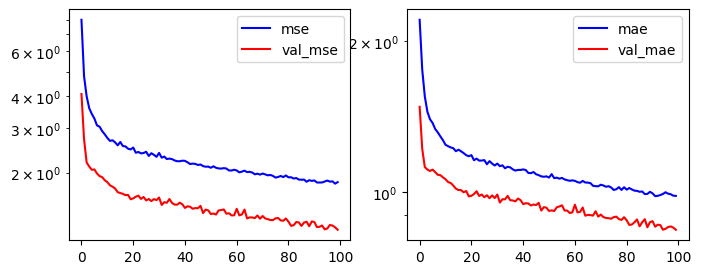

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3967 - mae: 0.9031


[1.4605207443237305, 0.9244049191474915]

In [143]:
plotloss(hn)
modeln.evaluate(Xn_test, y_test)

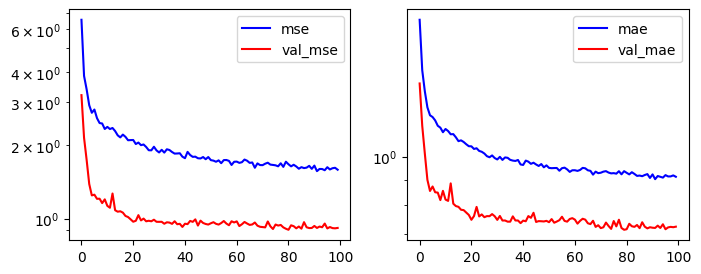

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2057 - mae: 0.8178


[1.2398796081542969, 0.8410223126411438]

In [144]:
plotloss(hs)
models.evaluate(Xs_test, y_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


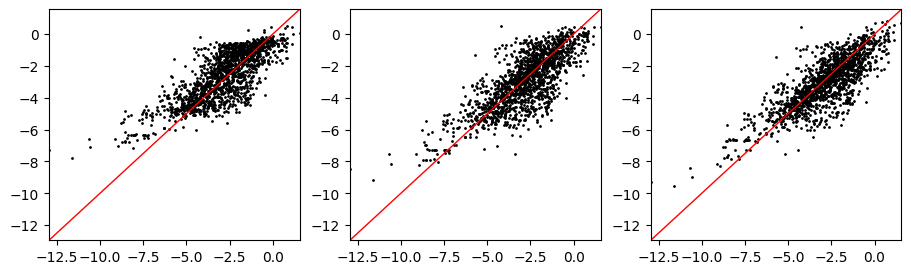

In [145]:
def compareScatter(model, X):
    plt.scatter(y_test, model.predict(X), s=1, c='black')
    ymin, ymax = np.min(y_test), np.max(y_test)
    ylim = np.array([ymin, ymax])
    plt.plot(ylim, ylim, lw=1, c='red')
    plt.xlim(ylim); plt.ylim(ylim)
    
plt.figure(figsize=(11,3))
plt.subplot(131)
compareScatter(model, X_test)

plt.subplot(132)
compareScatter(modeln, Xn_test)

plt.subplot(133)
compareScatter(models, Xs_test)

plt.show()

In [146]:
# Save model
model.save('model.keras')
modeln.save('modeln.keras')
models.save('models.keras')